In [2]:
# Import modules
import numpy as np
from tqdm import tqdm
import pandas as pd
import os


def remover(old_list, to_be_removed):
    if type(to_be_removed) == list:
        new_list = [element for element in old_list if element not in to_be_removed]
    else:
        new_list = [element for element in old_list if element != to_be_removed and type(element) == type(to_be_removed)]
    return new_list



filename = "Markus/Pandas_analysis/Subplots/Hub/EventData.csv"
event_data = pd.DataFrame(pd.read_csv(filename, low_memory = False))

datasets = event_data["dataset"]
particles = remover(event_data["particles"], "nan")
data_variables = remover(event_data["data_variables"], "nan")
event_data = event_data.drop(["Unnamed: 0", "dataset", "particles", "data_variables"], axis = 1)
data = np.array([event_data[column] for column in list(event_data.columns.values)])

event_data = pd.DataFrame(data = data.T, columns = pd.MultiIndex.from_tuples(zip(particles, data_variables)))

In [12]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Data and real values being split
x = event_data
y = datasets
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Define the model and train it
xgb_model = xgb.XGBClassifier(objective = "multi:softprob", random_state = 22, use_label_encoder = False, eval_metric = 'mlogloss')
xgb_model = xgb.XGBClassifier(objective = "multi:softprob", random_state = 22, use_label_encoder = False, eval_metric = 'mlogloss', max_depth = 3)

# Bruk disse om det er 2 forskjellige type dataset, derfor "binary"
# xgb_model = xgb.XGBClassifier(objective = "binary:logistic", random_state = 22, use_label_encoder = False, eval_metric = 'mlogloss')
# xgb_model = xgb.XGBClassifier(objective = "binary:logistic", random_state = 22, use_label_encoder = False, eval_metric = 'mlogloss', max_depth = 3)

(399638, 820)
(399638,)
(319710, 820)
(79928, 820)
(319710,)
(79928,)


In [13]:
# Train model on data
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=22, reg_alpha=0, ...)

In [14]:
# Make predictions with model
y_pred = xgb_model.predict(x_test)

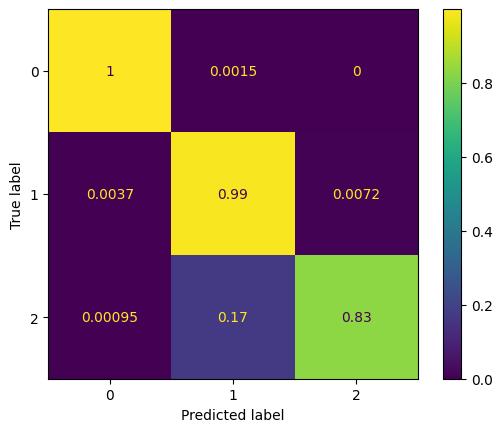

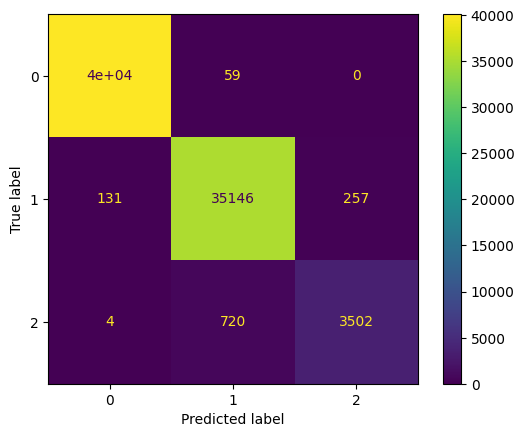

In [17]:
# Plot confusion matrix
conf = confusion_matrix(y_test, y_pred)
disp_norm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = conf)
disp.plot()
plt.show()

[409 514 515 516 517 518 519 520 521 522 513 523 525 526 527 528 529 530
 533 534 535 524 536 512 510 490 491 492 493 494 495 496 497 498 511 499
 501 502 503 504 505 506 507 508 509 500 541 543 550 580 581 582 583 584
 585 586 587 588 579 589 593 594 595 596 600 601 602 603 604 590 578 577
 576 551 552 553 555 558 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 489 488 487 486 417 418 419 420 421 422 423 424 425 416
 426 428 429 430 431 432 433 434 435 436 427 415 414 413 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 818 410 411 412 437
 605 438 440 466 467 468 469 470 471 472 473 474 465 475 477 478 479 480
 481 482 483 484 485 476 464 463 462 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 439 391 606 608 749 750
 751 752 753 754 755 756 757 748 758 760 761 762 763 764 765 766 767 768
 759 769 747 745 725 726 727 728 729 730 731 732 733 746 734 736 737 738
 739 740 741 742 743 744 735 770 771 772 798 799 80

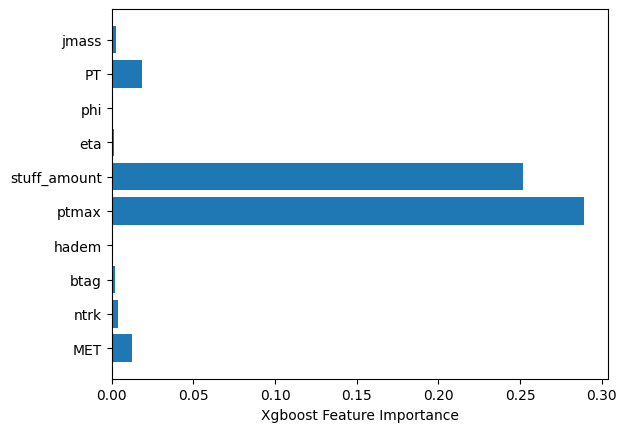

In [18]:
# Plot variables by importance for prediction
sorted_idx = xgb_model.feature_importances_.argsort()
print(sorted_idx)
print(np.array(data_variables)[sorted_idx])
plt.barh(np.array(data_variables)[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()